This notebook uses [PyTorch](https://pytorch.org/), which is a library that can automatically differentiate functions and is commonly used to implement neural networks. Because of its capability to automatically differentiate functions, the formula for the gradient does not need to be manually derived -- this comes especially handy when working with neural networks, whose gradient formula can be quite complicated, especially for complex architectures. 

We recommend going over the [PyTorch tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html) and then the starter code below. For any new functions that you come across, you can look up the documentation [here](https://pytorch.org/docs/stable/index.html). 

We recommend running this notebook on Google Colab to avoid having to install PyTorch and to take advantage of GPUs, which make training faster.

## Load packages

In [1]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

Run the following block to make sure we can reimport `autoencoder_starter.py` and `VAE_starter.py` whenever we change anything in the `.py` file

In [2]:
%load_ext autoreload
%autoreload 2

If running on Google Colab, you need to upload the file `autoencoder_starter.py`. To do so, you need to click on the folder icon on the left side of the page, which brings up a panel that would allow you to upload files. Note however uploading the file this way has a downside in that if your Python runtime times out or is otherwise restarted, the file will be erased and you will need to re-upload. 

If you would like to avoid this, you can create a directory named `CMPT_726Fall2021_A3` in your Google Drive and upload `autoencoder_starter.py` to that directory. Then execute the following block of code to mount your Google Drive. 

In [48]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}./data'.format(path_prefix),  train=True,download=True, transform=transform)

In [3]:
# Not using Colab
# from google.colab import drive
# drive.mount('/content/gdrive')
# path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)

# Part 1: Autoencoder with no hidden layer

## Define your architecture here.

The `Autoencoder` class has several important functions unimplemented. You are required to implement the two sub-classes of `Encoder` and `Decoder`, i.e, the architecture and forward function of the encoder and decoder.


In [45]:
class Autoencoder(nn.Module):
    def __init__(self,dim_latent_representation=2):
        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                self.fc = nn.Linear(28*28, output_size)

            def forward(self, x):
                x_flat=torch.reshape(x, (x.shape[0], 28*28))
                return self.fc(x_flat)

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                self.out = nn.Linear(input_size, 28*28)
                self.sigmoid = nn.Sigmoid()

            def forward(self, z):
                z_post_act = self.sigmoid(self.out(z))
                # FashionMNIST contains images of dimension 28*28 with 1 channel
                z_img=torch.reshape(z_post_act, (z_post_act.shape[0], 1, 28, 28))
                return z_img

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

## Training the Model

The training loop is provided by the `Autoencoder_Trainer` class from `autoencoder_starter.py`.

In [46]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 685.02it/s]

====> Epoch: 1 Average loss: 0.9066



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 860.36it/s]

====> Val set loss (reconstruction error) : 0.8144



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 692.46it/s]

====> Epoch: 2 Average loss: 0.7938



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 851.80it/s]

====> Val set loss (reconstruction error) : 0.7733



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 695.60it/s]

====> Epoch: 3 Average loss: 0.7693



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 881.74it/s]

====> Val set loss (reconstruction error) : 0.7620



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 724.12it/s]

====> Epoch: 4 Average loss: 0.7617



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 875.07it/s]

====> Val set loss (reconstruction error) : 0.7574



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 726.03it/s]

====> Epoch: 5 Average loss: 0.7587



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 883.04it/s]

====> Val set loss (reconstruction error) : 0.7551



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 724.98it/s]

====> Epoch: 6 Average loss: 0.7565



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 739.94it/s]

====> Val set loss (reconstruction error) : 0.7534



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 727.91it/s]

====> Epoch: 7 Average loss: 0.7554



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 828.33it/s]

====> Val set loss (reconstruction error) : 0.7529



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 733.19it/s]

====> Epoch: 8 Average loss: 0.7551



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 821.68it/s]

====> Val set loss (reconstruction error) : 0.7526



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 754.47it/s]

====> Epoch: 9 Average loss: 0.7548



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 890.52it/s]

====> Val set loss (reconstruction error) : 0.7523



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 726.73it/s]

====> Epoch: 10 Average loss: 0.7545



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 884.64it/s]

====> Val set loss (reconstruction error) : 0.7521


If in the above cell, you find that the download of the dataset is unsuccessful because the server is down, you can also download the data from Canvas and put the data in the same directory of this notebook and `autoencoder_starter.py`. If you are running this notebook on Google Colab, you can create a directory called `CMPT_726Fall2021_A3` in your Google Drive and put the data directory you downloaded from Canvas inside. Then if you haven't mounted your Google Drive earlier using the block of code above, mount Google Drive by executing the following block of code.

In [7]:
# Not using Colab
# from google.colab import drive
# drive.mount('/content/gdrive')
# path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

## Visualizing 2D Bottleneck Feature Representations

We can visualize the 2D bottleneck representations of data points and their ground truth class labels with a scatter plot.

The `scatter_plot` function takes the following arguments:
* latent_presentations - (N, dimension_latent_representation) numpy array
* labels - (N, ) numpy array: the labels of the ground truth classes

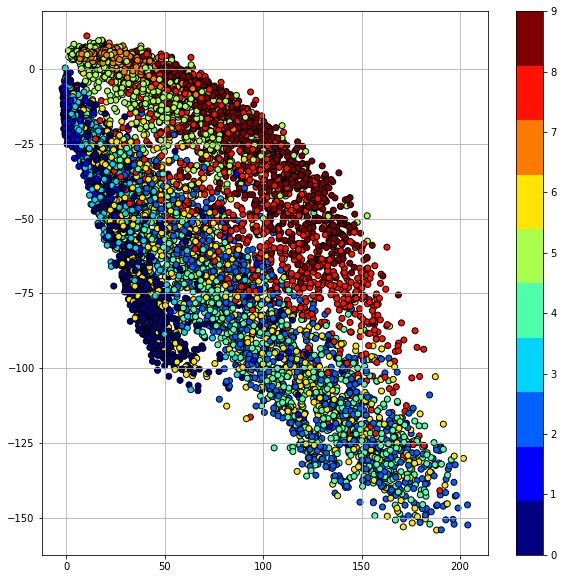

In [47]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

So here we can generate new images by sampling bottleneck features, and use the decoder to generate images. 

The code below provides an example of how to generate images by sampling bottleneck features. 

The `display_images_in_a_row` takes the following arguments:
* images: (N,28,28): N images of 28*28 as a numpy array
* file_path: file path name for where to store the figure
* display: display the image or not


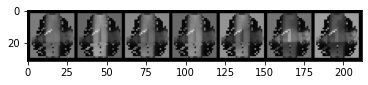

In [48]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

We can first retrieve the validation set and then pick 64 images (the first 64 images, though you can do it randomly).

We use the autoencoder to reconstruct the images and visualize them below.

Original images


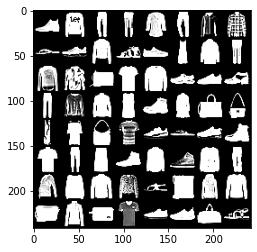

In [49]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


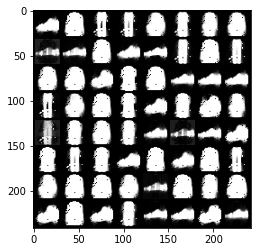

In [50]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

# Part 2: Autoencoder with a hidden layer

## Architecture

In [51]:
class Autoencoder(nn.Module):
    def __init__(self,dim_latent_representation=2):
        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                self.hidden_layer = nn.Linear(28*28, 1024)
                self.relu = nn.ReLU()
                self.fc = nn.Linear(1024, output_size)

            def forward(self, x):
                x_flat=torch.reshape(x, (x.shape[0], 28*28))
                hid_out = self.relu(self.hidden_layer(x_flat))
                return self.fc(hid_out)

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                self.hidden_layer = nn.Linear(input_size, 1024)
                self.relu = nn.ReLU()
                self.out = nn.Linear(1024, 28*28)
                self.sigmoid = nn.Sigmoid()

            def forward(self, z):
                hid_out = self.relu(self.hidden_layer(z))
                out = self.sigmoid(self.out(hid_out))
                # FashionMNIST contains images of dimension 28*28 with 1 channel
                img=torch.reshape(out, (out.shape[0], 1, 28, 28))
                return img

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

## Training

In [52]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 547.82it/s]

====> Epoch: 1 Average loss: 0.6913



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 901.43it/s]

====> Val set loss (reconstruction error) : 0.6684



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 501.30it/s]

====> Epoch: 2 Average loss: 0.6649



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 829.55it/s]

====> Val set loss (reconstruction error) : 0.6572



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 511.59it/s]

====> Epoch: 3 Average loss: 0.6570



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 879.25it/s]

====> Val set loss (reconstruction error) : 0.6534



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 541.28it/s]

====> Epoch: 4 Average loss: 0.6540



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 873.87it/s]

====> Val set loss (reconstruction error) : 0.6530



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 518.69it/s]

====> Epoch: 5 Average loss: 0.6527



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 818.61it/s]

====> Val set loss (reconstruction error) : 0.6507



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 537.84it/s]

====> Epoch: 6 Average loss: 0.6516



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 877.94it/s]

====> Val set loss (reconstruction error) : 0.6509



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 510.66it/s]

====> Epoch: 7 Average loss: 0.6507



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 849.92it/s]

====> Val set loss (reconstruction error) : 0.6495



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 517.61it/s]

====> Epoch: 8 Average loss: 0.6501



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 807.85it/s]

====> Val set loss (reconstruction error) : 0.6495



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 524.06it/s]


====> Epoch: 9 Average loss: 0.6494


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 770.30it/s]

====> Val set loss (reconstruction error) : 0.6485



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 512.24it/s]

====> Epoch: 10 Average loss: 0.6490



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 708.48it/s]

====> Val set loss (reconstruction error) : 0.6477


## Visualizing 2D Bottleneck Feature Representations

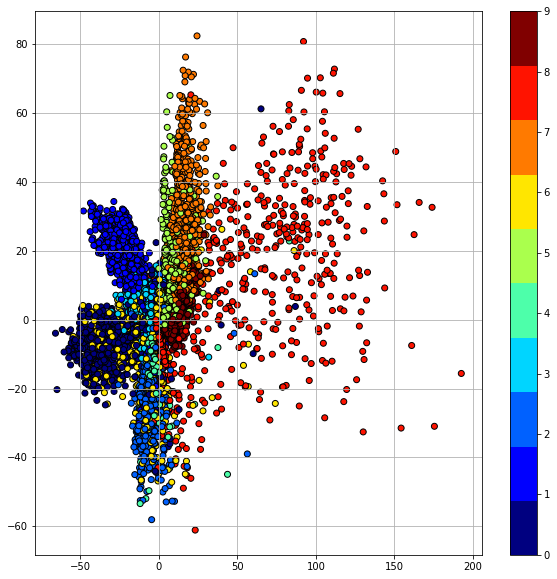

In [53]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

## Generating Images by Sampling Bottleneck Features

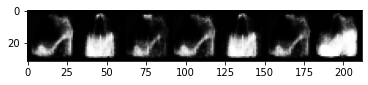

In [54]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

Original images


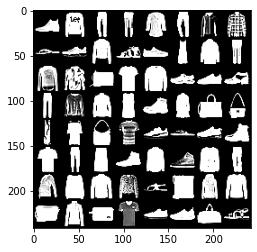

In [55]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


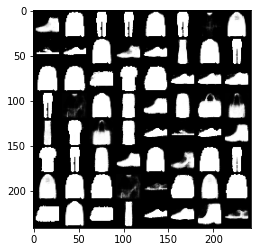

In [56]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

# Part 3: Denoising Autoencoders (DAE)

## Architecture

In [6]:
class DAE(nn.Module):
    def __init__(self,dim_latent_representation=30, noise_type=None):
        super(DAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=30):
                super(Encoder, self).__init__()
                self.fc = nn.Linear(28*28, output_size)
                self.tanh = nn.Tanh()

            def forward(self, x):
                x_flat=torch.reshape(x, (x.shape[0], 28*28))
                return self.tanh(self.fc(x_flat))

        class Decoder(nn.Module):
            def __init__(self, input_size=30):
                super(Decoder, self).__init__()
                self.out = nn.Linear(input_size, 28*28)
                self.sigmoid = nn.Sigmoid()

            def forward(self, z):
                z_post_act = self.sigmoid(self.out(z))
                # FashionMNIST contains images of dimension 28*28 with 1 channel
                z_img=torch.reshape(z_post_act, (z_post_act.shape[0], 1, 28, 28))
                return z_img

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)
        self.noise_type = noise_type

    #Implement this function for the DAE model
    def add_noise(self, x, noise_type):
        if noise_type=='Gaussian':
            # Gaussian Normal Noise: Mean = 0, Standard Deviation = 0.2
            noise = torch.normal(mean=0, std=0.2, size=x.shape)
            return x + noise.cuda()
        elif noise_type=='Dropout':
            # amount of salt
            salt = nn.Dropout(p=0.4)
            return salt(x)

    def forward(self, x):
        if(self.noise_type != None and self.training):
            x = self.add_noise(x, self.noise_type)
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Part 3a: No Noise added

## Training

In [58]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

dae = DAE(dim_latent_representation=30, noise_type=None)

trainer = Autoencoder_Trainer(autoencoder_model=dae,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 705.80it/s]

====> Epoch: 1 Average loss: 0.7324



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 874.49it/s]

====> Val set loss (reconstruction error) : 0.6473



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 736.09it/s]

====> Epoch: 2 Average loss: 0.6349



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 861.18it/s]

====> Val set loss (reconstruction error) : 0.6233



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 719.30it/s]

====> Epoch: 3 Average loss: 0.6202



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 850.68it/s]

====> Val set loss (reconstruction error) : 0.6152



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 714.29it/s]

====> Epoch: 4 Average loss: 0.6146



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 812.05it/s]

====> Val set loss (reconstruction error) : 0.6117



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 722.74it/s]

====> Epoch: 5 Average loss: 0.6120



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 868.05it/s]

====> Val set loss (reconstruction error) : 0.6097



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 692.59it/s]

====> Epoch: 6 Average loss: 0.6107



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 828.96it/s]

====> Val set loss (reconstruction error) : 0.6090



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 715.07it/s]

====> Epoch: 7 Average loss: 0.6100



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 884.04it/s]

====> Val set loss (reconstruction error) : 0.6086



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 718.04it/s]

====> Epoch: 8 Average loss: 0.6094



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 815.11it/s]

====> Val set loss (reconstruction error) : 0.6081



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 687.64it/s]

====> Epoch: 9 Average loss: 0.6091



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 916.40it/s]

====> Val set loss (reconstruction error) : 0.6079



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 686.96it/s]

====> Epoch: 10 Average loss: 0.6088



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 854.83it/s]

====> Val set loss (reconstruction error) : 0.6076


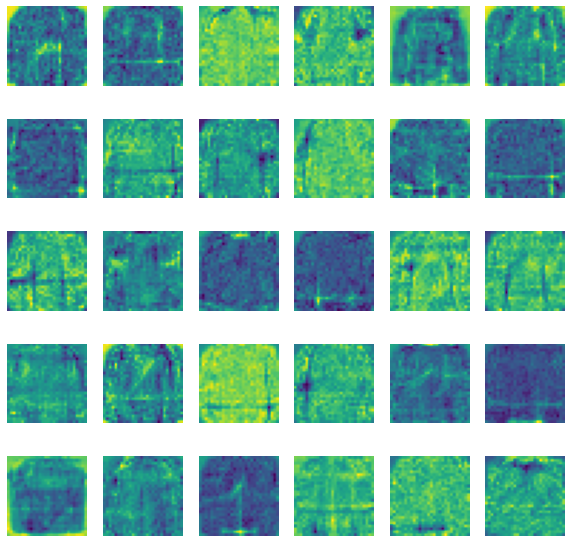

In [59]:
from autoencoder_starter import Plot_Kernel

Plot_Kernel(dae)

## Visualizing 2D Bottleneck Feature Representations

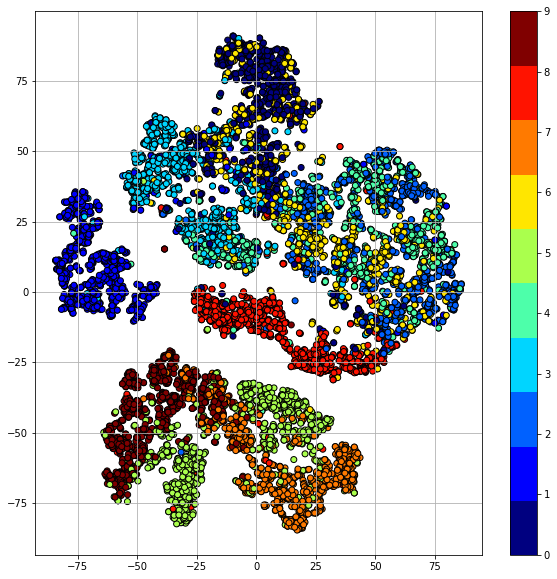

In [60]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)     #TSNE applied

## Generating Images by Sampling Bottleneck Features

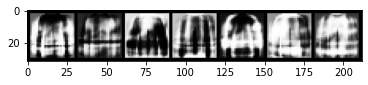

In [61]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

Original images


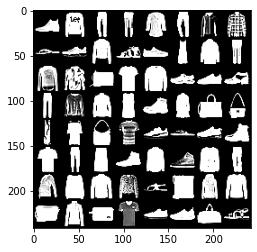

In [62]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


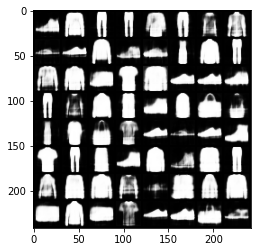

In [63]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

# Part 3b: Gaussian Noise

## Training

In [49]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

dae_gaussian = DAE(dim_latent_representation=30, noise_type="Gaussian")

trainer = Autoencoder_Trainer(autoencoder_model=dae_gaussian,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 650.31it/s]

====> Epoch: 1 Average loss: 0.7317



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 858.54it/s]

====> Val set loss (reconstruction error) : 0.6482



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 648.63it/s]

====> Epoch: 2 Average loss: 0.6359



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 873.23it/s]

====> Val set loss (reconstruction error) : 0.6239



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 639.23it/s]

====> Epoch: 3 Average loss: 0.6212



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 884.23it/s]

====> Val set loss (reconstruction error) : 0.6159



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 643.40it/s]

====> Epoch: 4 Average loss: 0.6155



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 835.35it/s]

====> Val set loss (reconstruction error) : 0.6122



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 670.73it/s]

====> Epoch: 5 Average loss: 0.6128



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 835.53it/s]

====> Val set loss (reconstruction error) : 0.6101



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 628.09it/s]

====> Epoch: 6 Average loss: 0.6114



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 826.05it/s]

====> Val set loss (reconstruction error) : 0.6096



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 641.95it/s]

====> Epoch: 7 Average loss: 0.6105



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 865.95it/s]

====> Val set loss (reconstruction error) : 0.6091



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 653.85it/s]

====> Epoch: 8 Average loss: 0.6100



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 810.72it/s]

====> Val set loss (reconstruction error) : 0.6087



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 646.45it/s]

====> Epoch: 9 Average loss: 0.6096



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 774.84it/s]

====> Val set loss (reconstruction error) : 0.6082



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 619.62it/s]

====> Epoch: 10 Average loss: 0.6093



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 859.01it/s]

====> Val set loss (reconstruction error) : 0.6076


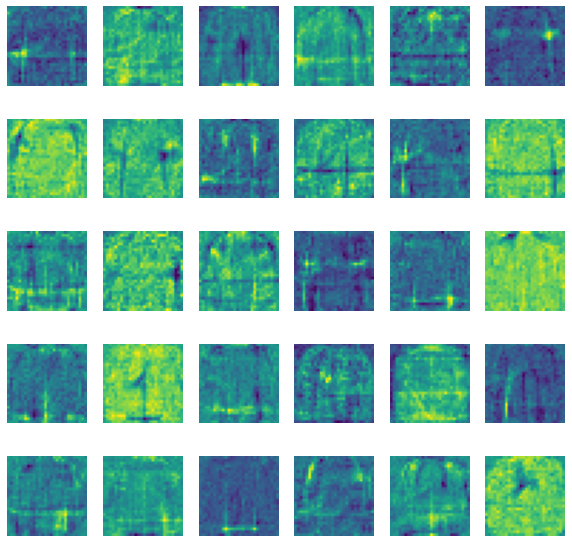

In [50]:
from autoencoder_starter import Plot_Kernel

Plot_Kernel(dae_gaussian)

## Visualizing 2D Bottleneck Feature Representations

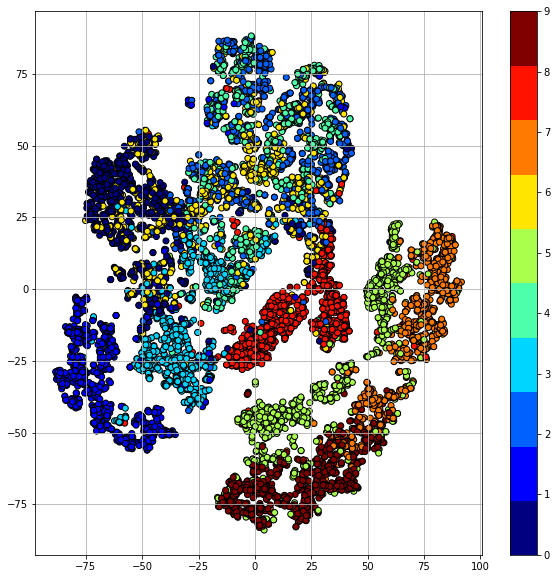

In [51]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)     #TSNE applied

## Generating Images by Sampling Bottleneck Features

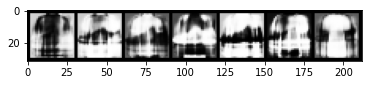

In [52]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

Original images


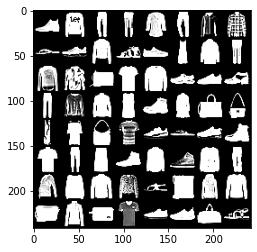

In [53]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


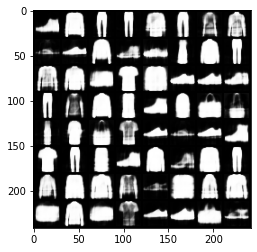

In [54]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

# Part 3c: Dropout Noise (Salt Noise)

## Training

In [55]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

dae_dropout = DAE(dim_latent_representation=30, noise_type="Dropout")

trainer = Autoencoder_Trainer(autoencoder_model=dae_dropout,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 662.86it/s]

====> Epoch: 1 Average loss: 0.7355



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 875.55it/s]

====> Val set loss (reconstruction error) : 0.6508



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 678.85it/s]

====> Epoch: 2 Average loss: 0.6420



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 833.59it/s]

====> Val set loss (reconstruction error) : 0.6286



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 656.86it/s]

====> Epoch: 3 Average loss: 0.6296



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 842.87it/s]

====> Val set loss (reconstruction error) : 0.6212



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 672.01it/s]

====> Epoch: 4 Average loss: 0.6250



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 905.00it/s]

====> Val set loss (reconstruction error) : 0.6185



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 672.27it/s]

====> Epoch: 5 Average loss: 0.6230



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 820.68it/s]

====> Val set loss (reconstruction error) : 0.6166



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 668.48it/s]

====> Epoch: 6 Average loss: 0.6220



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 849.83it/s]

====> Val set loss (reconstruction error) : 0.6160



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 680.50it/s]

====> Epoch: 7 Average loss: 0.6214



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 848.00it/s]

====> Val set loss (reconstruction error) : 0.6156



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 677.61it/s]

====> Epoch: 8 Average loss: 0.6209



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 855.55it/s]

====> Val set loss (reconstruction error) : 0.6151



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 693.41it/s]

====> Epoch: 9 Average loss: 0.6204



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 775.38it/s]

====> Val set loss (reconstruction error) : 0.6142



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 702.77it/s]

====> Epoch: 10 Average loss: 0.6200



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 809.90it/s]

====> Val set loss (reconstruction error) : 0.6140


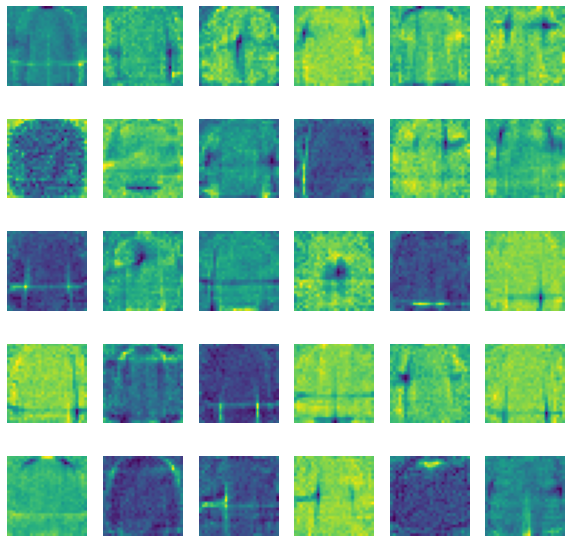

In [56]:
from autoencoder_starter import Plot_Kernel

Plot_Kernel(dae_dropout)

## Visualizing 2D Bottleneck Feature Representations

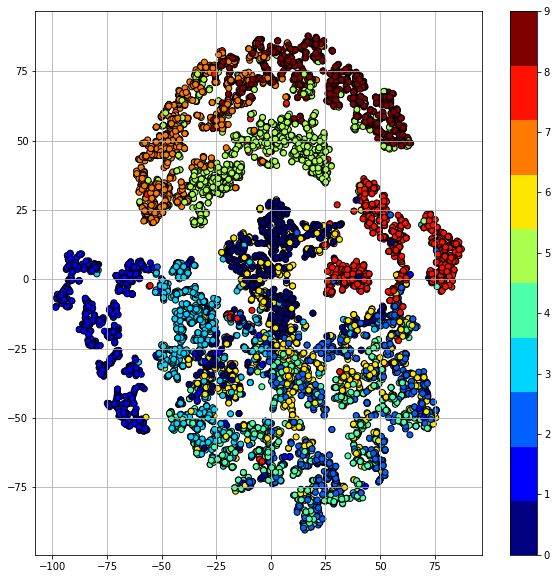

In [57]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)     #TSNE applied

## Generating Images by Sampling Bottleneck Features

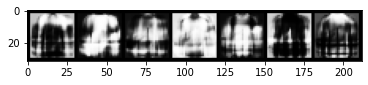

In [58]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

Original images


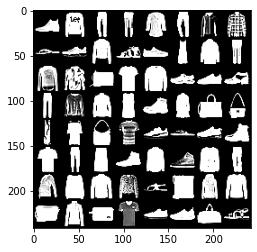

In [59]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


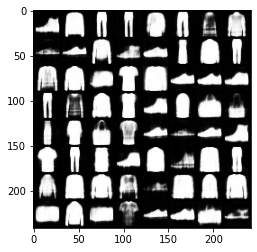

In [60]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

# Part 4: Variational Autoencoders (VAE)

## Architecture

In [4]:
class VAE(nn.Module):
    def __init__(self,dim_latent_representation=30):
        super(VAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=30):
                super(Encoder, self).__init__()
                self.fc = nn.Linear(28*28, output_size)
                self.tanh = nn.Tanh()
                self.mu_layer = nn.Linear(output_size, dim_latent_representation)
                self.std_layer = nn.Linear(output_size, dim_latent_representation)

            def forward(self, x):
                x_flat=torch.reshape(x, (x.shape[0], 28*28))
                z = self.tanh(self.fc(x_flat))
                mu = self.mu_layer(z)
                logvar = self.std_layer(z)
                return z, mu, logvar

        class Decoder(nn.Module):
            def __init__(self, input_size=30):
                super(Decoder, self).__init__()
                self.out = nn.Linear(input_size, 28*28)
                self.sigmoid = nn.Sigmoid()

            def forward(self, z):
                z_post_act = self.sigmoid(self.out(z))
                # FashionMNIST contains images of dimension 28*28 with 1 channel
                z_img=torch.reshape(z_post_act, (z_post_act.shape[0], 1, 28, 28))
                return z_img

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)
    

    # Implement this function for the VAE model
    # This will sample from the Gaussian Normal Distribution N(0, 1)
    def reparameterise(self, mu, logvar):
        if self.training:
            return mu + torch.exp(logvar * 0.5) * torch.randn_like(mu)
        else:
            return mu

    def forward(self, x):
        z, mu, logvar = self.encoder(x)
        z = self.reparameterise(mu, logvar)
        reconstructed_x = self.decoder(z)
        # for the VAE forward function should also return mu and logvar
        return reconstructed_x, mu, logvar

# Part 4a: Autoencoder

## Training

In [57]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

autoencoder = DAE(dim_latent_representation=30, noise_type=None)    # Autoencoder asked in the question is exactly like DAE with no noise
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 705.86it/s]

====> Epoch: 1 Average loss: 0.7300



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 869.60it/s]

====> Val set loss (reconstruction error) : 0.6465



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 718.95it/s]

====> Epoch: 2 Average loss: 0.6338



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 834.46it/s]

====> Val set loss (reconstruction error) : 0.6226



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 730.84it/s]

====> Epoch: 3 Average loss: 0.6197



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 812.66it/s]

====> Val set loss (reconstruction error) : 0.6151



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 725.59it/s]

====> Epoch: 4 Average loss: 0.6142



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 888.98it/s]

====> Val set loss (reconstruction error) : 0.6118



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 719.64it/s]

====> Epoch: 5 Average loss: 0.6117



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 792.24it/s]

====> Val set loss (reconstruction error) : 0.6102



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 694.10it/s]

====> Epoch: 6 Average loss: 0.6104



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 842.06it/s]

====> Val set loss (reconstruction error) : 0.6091



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 713.35it/s]

====> Epoch: 7 Average loss: 0.6094



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 853.59it/s]

====> Val set loss (reconstruction error) : 0.6084



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 701.89it/s]

====> Epoch: 8 Average loss: 0.6088



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 900.61it/s]

====> Val set loss (reconstruction error) : 0.6081



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 740.35it/s]

====> Epoch: 9 Average loss: 0.6084



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 843.59it/s]

====> Val set loss (reconstruction error) : 0.6077



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:02<00:00, 712.75it/s]

====> Epoch: 10 Average loss: 0.6080



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 851.15it/s]

====> Val set loss (reconstruction error) : 0.6073


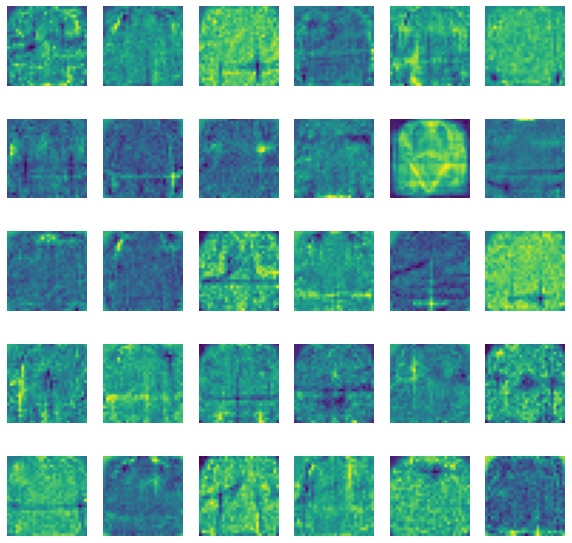

In [58]:
from autoencoder_starter import Plot_Kernel

Plot_Kernel(autoencoder)

## Visualizing 2D Bottleneck Feature Representations

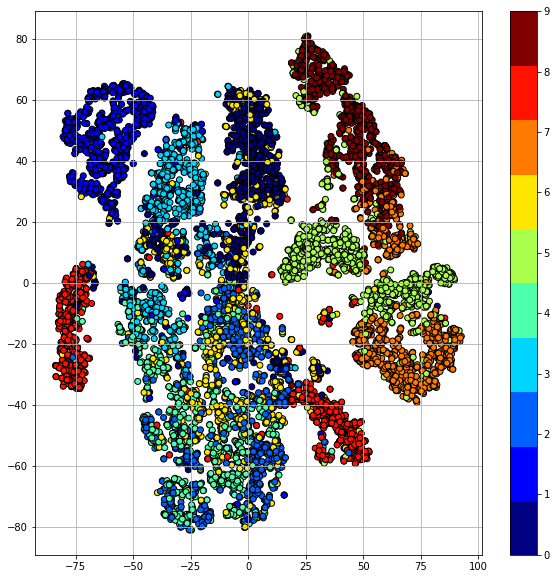

In [59]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)     #TSNE applied

## Generating Images by Sampling Bottleneck Features

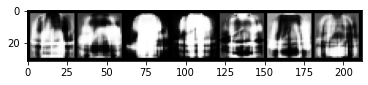

In [60]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

Original images


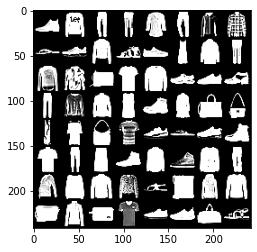

In [61]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


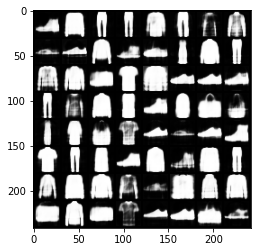

In [62]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

# Part 4b: Variational Autoencoder (VAE)

## Training

In [63]:
from VAE_starter import VAE_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 10 # the number of epochs and learning rate can be tuned.

vae = VAE(dim_latent_representation=30)
trainer = VAE_Trainer(vae_model=vae,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 474.98it/s]

====> Epoch: 1 Average loss: 0.7885



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 810.66it/s]

====> Val set loss (reconstruction error) : 0.6492



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 478.95it/s]

====> Epoch: 2 Average loss: 0.7140



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 849.24it/s]

====> Val set loss (reconstruction error) : 0.6335



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 479.09it/s]

====> Epoch: 3 Average loss: 0.7040



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 807.64it/s]

====> Val set loss (reconstruction error) : 0.6266



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:04<00:00, 465.35it/s]

====> Epoch: 4 Average loss: 0.6984



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 832.97it/s]

====> Val set loss (reconstruction error) : 0.6243



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 477.48it/s]

====> Epoch: 5 Average loss: 0.6939



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 862.15it/s]

====> Val set loss (reconstruction error) : 0.6202



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 470.50it/s]

====> Epoch: 6 Average loss: 0.6898



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 866.88it/s]

====> Val set loss (reconstruction error) : 0.6187



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:04<00:00, 464.70it/s]

====> Epoch: 7 Average loss: 0.6867



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 815.01it/s]

====> Val set loss (reconstruction error) : 0.6171



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:04<00:00, 443.39it/s]

====> Epoch: 8 Average loss: 0.6845



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 809.29it/s]

====> Val set loss (reconstruction error) : 0.6159



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:04<00:00, 461.90it/s]

====> Epoch: 9 Average loss: 0.6828



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 860.55it/s]

====> Val set loss (reconstruction error) : 0.6159



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:03<00:00, 479.56it/s]

====> Epoch: 10 Average loss: 0.6816



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 888.64it/s]

====> Val set loss (reconstruction error) : 0.6159


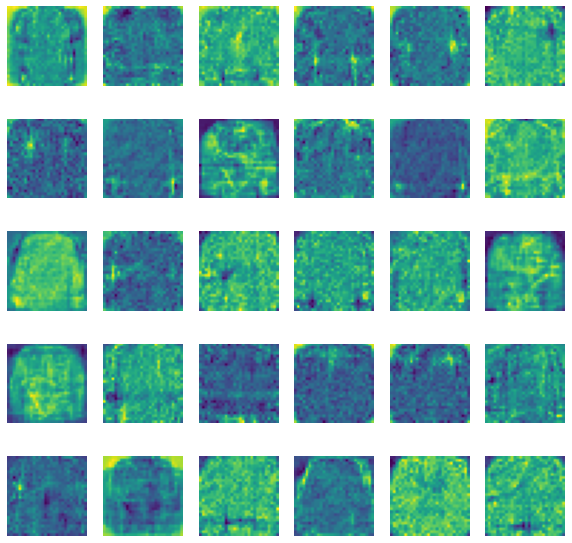

In [64]:
from autoencoder_starter import Plot_Kernel

Plot_Kernel(vae)

## Visualizing 2D Bottleneck Feature Representations

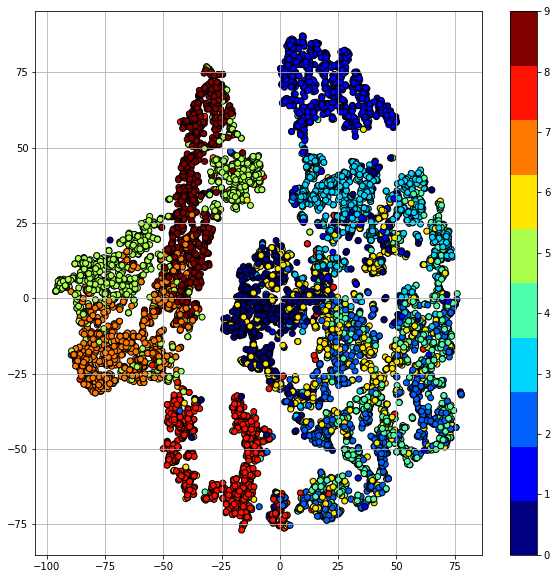

In [65]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_, _, _ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)     #TSNE applied

## Generating Images by Sampling Bottleneck Features

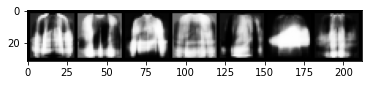

In [66]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

## Reconstructing Images

Original images


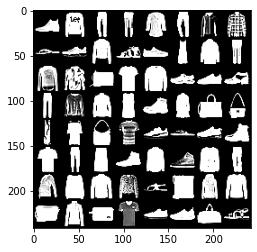

In [67]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


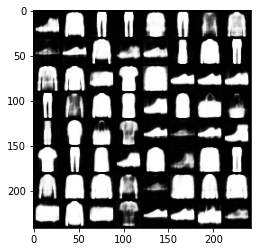

In [68]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images)[0].cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)